In [9]:
%matplotlib inline


# K-means Clustering


The plots display firstly what a K-means algorithm would yield
using three clusters. It is then shown what the effect of a bad
initialization is on the classification process:
By setting n_init to only 1 (default is 10), the amount of
times that the algorithm will be run with different centroid
seeds is reduced.
The next plot displays what using eight clusters would deliver
and finally the ground truth.



ground truth label
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
clustering labels
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
The cluster result of class 0 :
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#correct clustering: 50
The cluster result of class 1 :
 [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,

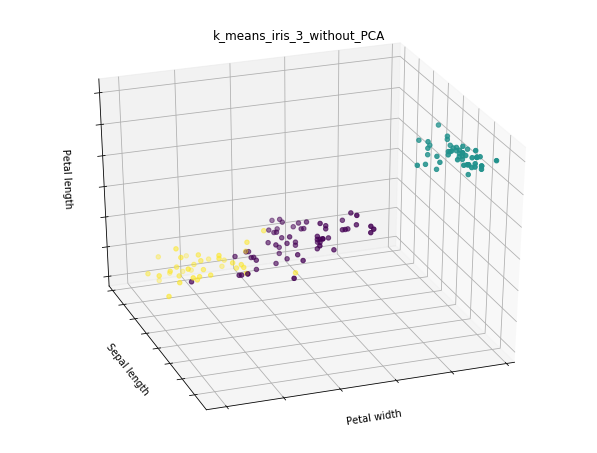

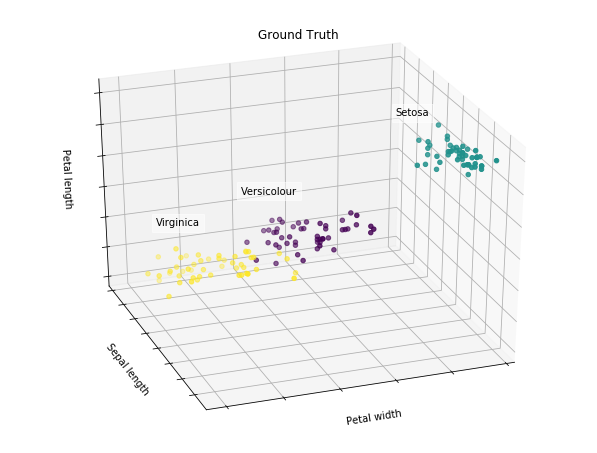

In [17]:
#!/usr/bin/env python3.5
#-*- coding: utf-8 -*-
##########################K means without PCA##################

# Modified based on Gaël Varoquaux's code by jimmy shen on April, 2017.
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

################################################################
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

#This function can compare the clustering result with the ground truth
# and then return the correct clustering ratio.
def cluster_result_analysis(a, b, class_number):
    a=list(a)
    b=list(b)
    correct_cluster=0
    for j in range(class_number):
        cluster_result_of_the_ground_truth=[]
        indexes = [i for i,x in enumerate(a) if x == j]
        for k in range(len(indexes)):
            cluster_result_of_the_ground_truth.append(b[indexes[k]])
        print("The cluster result of class",j, ":\n",cluster_result_of_the_ground_truth)
        number_of_correct_cluster=cluster_result_of_the_ground_truth.count(max(cluster_result_of_the_ground_truth,key=cluster_result_of_the_ground_truth.count))
        print("#correct clustering:",number_of_correct_cluster)
        correct_cluster+=number_of_correct_cluster
    return float(correct_cluster)/len(b)   



#####   Plot the clustering result   ########################
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
#print("X", X)
#print(type(y))
print("ground truth label\n", y)
estimators = {'k_means_iris_3_without_PCA': KMeans(n_clusters=3),}


for name, est in estimators.items():
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    print("clustering labels\n",labels)
    print("The K mean clustering Accuracy without PCA:%.4f" % (cluster_result_analysis(y,labels,3)))
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(label=name, fontdict=None, loc=u'center')

    
    
#####   Plot the ground truth   ########################
fig = plt.figure(2, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
plt.cla()


for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 0, 2]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title(label="Ground Truth", fontdict=None, loc=u'center')
plt.show()

ground truth label
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
clustering labels
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
The cluster result of class 0 :
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#correct clustering: 50
The cluster result of class 1 :
 [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,

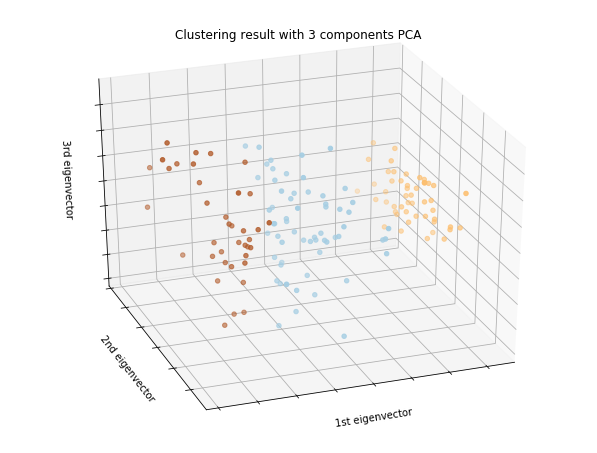

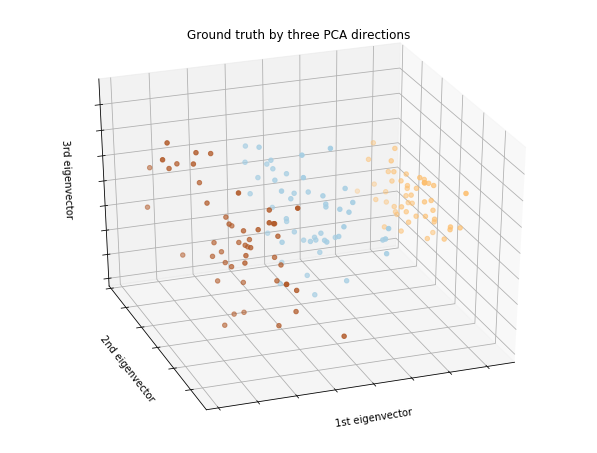

In [15]:
#!/usr/bin/env python3.5
#-*- coding: utf-8 -*-
########      K means with PCA(3_components or ##################
###           3 dimensional feature vectors)   ##

# Modified based on Gaël Varoquaux's code by jimmy shen on April, 2017.
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

################################################################


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
#This function can compare the clustering result with the ground truth
# and then return the correct clustering ratio.
def cluster_result_analysis(a, b, class_number):
    a=list(a)
    b=list(b)
    correct_cluster=0
    for j in range(class_number):
        cluster_result_of_the_ground_truth=[]
        indexes = [i for i,x in enumerate(a) if x == j]
        for k in range(len(indexes)):
            cluster_result_of_the_ground_truth.append(b[indexes[k]])
        print("The cluster result of class",j, ":\n",cluster_result_of_the_ground_truth)
        number_of_correct_cluster=cluster_result_of_the_ground_truth.count(max(cluster_result_of_the_ground_truth,key=cluster_result_of_the_ground_truth.count))
        print("#correct clustering:",number_of_correct_cluster)
        correct_cluster+=number_of_correct_cluster
    return float(correct_cluster)/len(b)   

# import some data to play with
iris = datasets.load_iris()
y = iris.target

print("ground truth label\n", y)

estimators = {'k_means_iris_3_with_PCA': KMeans(n_clusters=3),}
X_reduced = PCA(n_components=3).fit_transform(iris.data)

for name, est in estimators.items():
    est.fit(X_reduced)
    labels = est.labels_
    print("clustering labels\n",labels)
    print("The K mean clustering Accuracy with PCA(3 components):%.4f" % (cluster_result_analysis(y,labels,3)))
    fig = plt.figure(3, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
           cmap=plt.cm.Paired)
    ax.set_title("Clustering result with 3 components PCA")
    ax.set_xlabel("1st eigenvector")
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector")
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector")
    ax.w_zaxis.set_ticklabels([])
    plt.show()

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 0, 2]).astype(np.float)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Paired)
ax.set_title("Ground truth by three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


ground truth label
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
clustering labels
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
The cluster result of class 0 :
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#correct clustering: 50
The cluster result of class 1 :
 [0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,

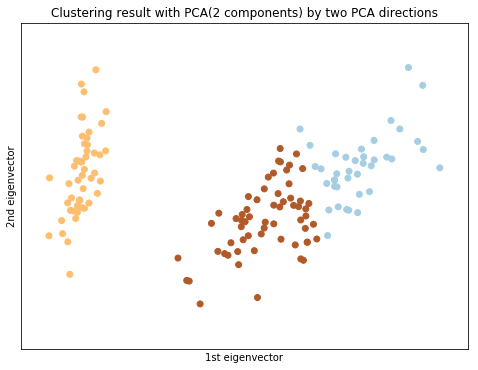

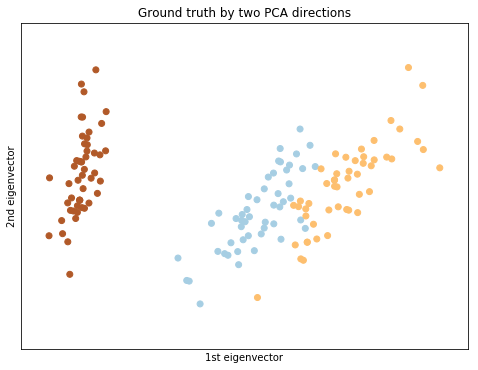

In [16]:
#!/usr/bin/env python3.5
#-*- coding: utf-8 -*-
########      K means with PCA(2_components or ##################
###           2 dimensional feature vectors)   ##

# Modified based on Gaël Varoquaux's code by jimmy shen on April, 2017.
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

################################################################


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
#This function can compare the clustering result with the ground truth
# and then return the correct clustering ratio.
def cluster_result_analysis(a, b, class_number):
    a=list(a)
    b=list(b)
    correct_cluster=0
    for j in range(class_number):
        cluster_result_of_the_ground_truth=[]
        indexes = [i for i,x in enumerate(a) if x == j]
        for k in range(len(indexes)):
            cluster_result_of_the_ground_truth.append(b[indexes[k]])
        print("The cluster result of class",j, ":\n",cluster_result_of_the_ground_truth)
        number_of_correct_cluster=cluster_result_of_the_ground_truth.count(max(cluster_result_of_the_ground_truth,key=cluster_result_of_the_ground_truth.count))
        print("#correct clustering:",number_of_correct_cluster)
        correct_cluster+=number_of_correct_cluster
    return float(correct_cluster)/len(b)   

# import some data to play with
iris = datasets.load_iris()
y = iris.target

X_reduced = PCA(n_components=2).fit_transform(iris.data)
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5



print("ground truth label\n", y)

estimators = {'k_means_iris_3_with_PCA': KMeans(n_clusters=3),}


for name, est in estimators.items():
    est.fit(X_reduced)
    labels = est.labels_
    print("clustering labels\n",labels)
    print("The K mean clustering Accuracy with PCA(2 components):%.4f" % (cluster_result_analysis(y,labels,3)))
   
    x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
    y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5

    plt.figure(5, figsize=(8, 6))
    plt.clf()

    # Plot the training points
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap=plt.cm.Paired)
    plt.xlabel('1st eigenvector')
    plt.ylabel('2nd eigenvector')
    plt.title("Clustering result with PCA(2 components) by two PCA directions")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    

    
#plot ground truth result

    
plt.figure(6, figsize=(8, 6))
plt.clf()

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [2, 0, 1]).astype(np.float)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("Ground truth by two PCA directions")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

